In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

## Rosbank ML Competition

Ссылка на соревнование: https://boosters.pro/champ_15

Росбанк – часть ведущей международной финансовой группы Societe Generale, банк включен ЦБ РФ в число 11 системно значимых кредитных организаций России. Инновации неотъемлемый процесс работы Росбанка, поэтому активно развивается направленный анализа больших данных.

- Данные

Датасет, который содержит историю транзакций клиентов за 3 месяца льготного использования банковского продукта

- Задача

Задача бинарной классификации – прогноз оттока клиентов

Колонка cl_id содержит вутренний id клиента. Для каждого уникальнго cl_id следует предсказать продолжит ли клиент пользоваться продуктом (target_flag). Значение 0 соответствует отказу, а значение 1 соответствует продолжению использования

In [33]:
raw_df = pd.read_csv('rosbank_train.csv')
raw_df.head(5)
# target_sum - можно выкинуть, переменная участвует в другой задаче

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [34]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490513 entries, 0 to 490512
Data columns (total 10 columns):
PERIOD          490513 non-null object
cl_id           490513 non-null int64
MCC             490513 non-null int64
channel_type    487603 non-null object
currency        490513 non-null int64
TRDATETIME      490513 non-null object
amount          490513 non-null float64
trx_category    490513 non-null object
target_flag     490513 non-null int64
target_sum      490513 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 29.9+ MB


In [35]:
print("Total clients: ", len(raw_df.cl_id.unique()))

Total clients:  5000


Всего 5000 клиентов, случайным образом возьмем 1000 клиентов для тестирования

In [36]:
cl_ids_test = np.random.choice(raw_df.cl_id.unique(), size=1000, replace=False)
cl_ids_test_set = set(cl_ids_test)
len(cl_ids_test_set)

1000

In [37]:
# create transactions dataset for train
transactions_train = raw_df[~raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in train dataset: ", len(transactions_train))
# create transactions dataset for test
transactions_test = raw_df[raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in test dataset: ", len(transactions_test))

Total transactions in train dataset:  391755
Total transactions in test dataset:  98758


## Домашняя работа

1. Наборы данных вида Transactions (несколько транзакций на одного клиента) трансформировать в таблицу, где cl_id будут уникальными (соответственно 4000 строк в train и 1000 строк в test
2. Для каждого cl_id будет уникальное целевое событие target_flag, а также уникальный канал привлечения клиента channel_type (клиент привлекается лишь однажды и с самого начала его записи присваивается значение канала привлечения)
3. При агрегации (*pandas.DataFrame.groupby*) по cl_id (или по связке cl_id, channel_type, target_flag) необходимо создавать производные фичи, идеи для таких фичей могут быть следующими:

    - общая сумма транзакций по каждой из trx_category
    - общая сумма транзакции по основным вылютам (напр. выделить рубли, доллары и евро - предположительно, это будут самые крупные категории)
    - общая сумма транзакций по категориям MCC кодов (например, выбрать основные/популярные MCC коды). ВНИМАНИ! Некоторые MCC коды из train могут быть не представлены в test. Про MCC коды в целом: http://www.banki.ru/wikibank/mcc-kod/; Справочник MCC кодов: https://mcc-codes.ru/code; Про некоторые категории кэшбека Росбанка: https://mcc-codes.ru/card/rosbank-sverkh-plus;
    - возможные агрегации по времени суток и дням недели - траты в выходные (праздники) или будни, в ночное время или в рабочее и т.д.
4. **Обязательная часть**: провести первичный анализ данных - посмотреть распределения признаков, выделить самые популярные MCC, помотреть активность клиентов по дням недели/времени, какие категории транзакции (trx_category) наиболее популярны и т.д. Получить инсайты, которые в дальнейшем помогут вам правильно подготовить фичи
5. **Дополнительная часть**: с отобранными фичами и полученными компонентами обучить модель (тип алгоритма на свой вкус, можно начать с линейной) и померить качество на локальном тестовом наборе данных (локальная валидация), который создается в этом ноутбуке. **Метрика оценки качества - ROC AUC**(https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
6. Задания принимаются в виде ноутбука с кодов/картинками выполненной обязательной части + указанием места в leaderboard при решении дополнительной

При возникновении вопросов и для отправки домашнего задания - egsachko@gmail.com или http://fb.com/sachkoe
    

In [38]:
transactions_train.channel_type.value_counts(dropna=False)

type1    241497
type2    136390
type5      4484
type4      4044
type3      2756
NaN        2584
Name: channel_type, dtype: int64

In [39]:
raw_df_grouped = raw_df[
    ['cl_id', 'amount', 'MCC']
].groupby(['cl_id', 'MCC']).agg(['sum', 'count'])

# aggregated_dataset = raw_df_grouped.unstack().fillna(0)
aggregated_dataset = raw_df_grouped.unstack()

In [40]:
def transaction_by_day_count(dataset):
    dataset['day_of_transaction'] = dataset['TRDATETIME'].apply( lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%w') ) 
    tmp_df = dataset.groupby(['cl_id','day_of_transaction'])['day_of_transaction'].size().unstack().fillna(0).reset_index()
    old_columns = [old_col for old_col in tmp_df.columns.tolist() if old_col in dataset['day_of_transaction'].unique()]
    tmp_df.rename(columns={old_col: 'day_' + old_col for old_col in old_columns}, inplace=True)
    return tmp_df
    
    

def transaction_by_hour_count(dataset):
    dataset['hour_of_transaction'] = dataset['TRDATETIME'].apply( lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%H') ) 
    return dataset.groupby(['cl_id','hour_of_transaction'])['hour_of_transaction'].size().unstack().fillna(0).reset_index()

In [41]:
transaction_by_day_count(raw_df).head()

day_of_transaction,cl_id,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,0,0.0,0.0,2.0,0.0,1.0,0.0,2.0
1,1,7.0,20.0,20.0,16.0,16.0,10.0,15.0
2,5,15.0,19.0,19.0,15.0,25.0,24.0,25.0
3,9,5.0,8.0,7.0,5.0,6.0,4.0,4.0
4,10,74.0,35.0,62.0,68.0,65.0,57.0,102.0


In [42]:
import sqlite3

In [43]:
conn = sqlite3.connect('transaction.db')

In [44]:
raw_df.to_sql('transactions_raw', if_exists = 'replace', con = conn)

In [45]:
check = pd.io.sql.read_sql("""
    select * from transactions_raw limit 100
    """, conn
)

In [46]:
pd.io.sql.read_sql("""
    select count(*), count(distinct cl_id) from transactions_raw
    """, conn
)

,count(*),count(distinct cl_id)
0,490513,5000


In [47]:
datamart_check = pd.io.sql.read_sql("""
    select
        cl_id,
        target_flag,
        sum(case when MCC = 5411 then amount else 0 end) as MCC_5411,
        sum(case when MCC = 6011 then amount else 0 end) as MCC_6011,
        sum(case when MCC = 5814 then amount else 0 end) as MCC_5814,
        sum(case when MCC = 5812 then amount else 0 end) as MCC_5812,
        sum(case when MCC = 5499 then amount else 0 end) as MCC_5499
    from transactions_raw
    group by 1, 2
    order by 1
    """, conn
)

In [48]:
datamart_check.shape

(5000, 7)

In [49]:
datamart_check.head()

,cl_id,target_flag,MCC_5411,MCC_6011,MCC_5814,MCC_5812,MCC_5499
0,0,0,2031.00,20000.0,0.00,0.00,0.00
1,1,0,14629.46,145000.0,82441.17,3180.01,492.80
2,5,1,44925.40,208000.0,247.00,3309.00,7196.70
3,9,0,39.00,540000.0,0.00,0.00,0.00
4,10,0,53920.36,854000.0,2010.00,319.00,13225.02


In [50]:
MCC_list = raw_df.MCC.value_counts().head().index.tolist()
for MCC_code in MCC_list:
    print(
        'sum(case when MCC = {0} then amount else 0 end) as MCC_{0}'.format(MCC_code)
    )

sum(case when MCC = 5411 then amount else 0 end) as MCC_5411
sum(case when MCC = 6011 then amount else 0 end) as MCC_6011
sum(case when MCC = 5814 then amount else 0 end) as MCC_5814
sum(case when MCC = 5812 then amount else 0 end) as MCC_5812
sum(case when MCC = 5499 then amount else 0 end) as MCC_5499


In [51]:
# 1) общая сумма транзакций по каждой из trx_category
transactions_train.trx_category.value_counts()

POS               332640
DEPOSIT            16839
WD_ATM_ROS         14965
WD_ATM_PARTNER      8109
C2C_IN              5931
WD_ATM_OTHER        5681
C2C_OUT             4399
BACK_TRX            2158
CAT                 1001
CASH_ADV              32
Name: trx_category, dtype: int64

In [52]:
transactions_test.trx_category.value_counts()

POS               83785
DEPOSIT            4377
WD_ATM_ROS         4139
WD_ATM_PARTNER     1839
WD_ATM_OTHER       1459
C2C_IN             1375
C2C_OUT            1057
BACK_TRX            529
CAT                 196
CASH_ADV              2
Name: trx_category, dtype: int64

In [53]:
# общая сумма транзакции по основным вылютам (напр. выделить рубли, доллары и евро 
# - предположительно, это будут самые крупные категории)
# 810 - RUR
# 978 - EUR
# 840 - USD

# количество транзакций 
transactions_train[['currency', 'amount']].groupby('currency').count().sort_values(by='amount', ascending = False).head()

,amount
currency,
810,381932
978,4297
840,1625
933,385
764,341


In [54]:
# сумма по каждму виду валюты - количество денег
transactions_train[['currency', 'amount']].groupby('currency').sum().sort_values(by='amount', ascending = False).head()

,amount
currency,
810,2.031169e+09
704,1.367180e+08
360,6.569042e+07
410,7.738700e+06
51,1.227029e+06


In [55]:
transactions_train.MCC.value_counts().head()

5411    97976
6011    43209
5814    32626
5812    23844
5499    21693
Name: MCC, dtype: int64

In [56]:
transactions_test.MCC.value_counts().head()

5411    23664
6011    11173
5814     8725
5812     6183
5499     5544
Name: MCC, dtype: int64

In [57]:
transactions_test.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [58]:
# по времени суток
def transaction_hour(dataset):
    dataset['hour_of_transaction'] = dataset['TRDATETIME'].apply( lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%H') ) 
    return dataset

transaction_hour(transactions_test)
transactions_test.groupby('hour_of_transaction').count()[['TRDATETIME']].head()

,TRDATETIME
hour_of_transaction,
00,86872
01,62
02,120
03,108
04,146


In [59]:
# дням недели
transaction_by_day_count(transactions_test)
transactions_test.groupby('day_of_transaction').count()[['TRDATETIME']]

,TRDATETIME
day_of_transaction,
0,12500
1,13099
2,13910
3,14206
4,14552
5,15806
6,14685


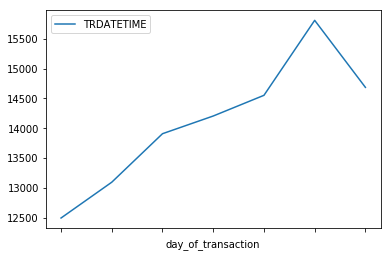

In [60]:
transactions_test.groupby('day_of_transaction').count()[['TRDATETIME']].plot()

In [71]:
# траты в выходные (праздники) 
a = transactions_test.groupby('day_of_transaction').count()[['TRDATETIME']].sort_values(by='day_of_transaction', ascending = False).head(2)
a

,TRDATETIME
day_of_transaction,
6,14685
5,15806


In [74]:
# будни
b = transactions_test.groupby('day_of_transaction').count()[['TRDATETIME']].head()
b

,TRDATETIME
day_of_transaction,
0,12500
1,13099
2,13910
3,14206
4,14552
